# Random Forest Implementation
*Allyson Tom,  Jacob Adams, Drew Pearson*

In [2]:
import pandas as pd
import re
import numpy as np
import os
from matplotlib import pyplot as plt
from __future__ import division
import seaborn as sns

%matplotlib inline

In [2]:
hittersDF = pd.read_csv('./CSV_files/cleanCSV/hittersDF.csv')
pitchersDF = pd.read_csv('./CSV_files/cleanCSV/pitchersDF.csv')
espn_hitters = pd.read_csv('./CSV_files/cleanCSV/espn_hitters.csv')
espn_pitchers = pd.read_csv('./CSV_files/cleanCSV/espn_pitchers.csv')
fangraphs_hitters = pd.read_csv('./CSV_files/cleanCSV/fangraphs_hitters.csv')
fangraphs_pitchers = pd.read_csv('./CSV_files/cleanCSV/fangraphs_pitchers.csv')
guru_hitters = pd.read_csv('./CSV_files/cleanCSV/guru_hitters.csv')
guru_pitchers = pd.read_csv('./CSV_files/cleanCSV/guru_pitchers.csv')
marcel_hitters = pd.read_csv('./CSV_files/cleanCSV/marcel_hitters.csv')
marcel_pitchers = pd.read_csv('./CSV_files/cleanCSV/marcel_pitchers.csv')
cbs_hitters = pd.read_csv('./CSV_files/cleanCSV/cbs_hitters.csv')
cbs_pitchers = pd.read_csv('./CSV_files/cleanCSV/cbs_pitchers.csv')
steamer_hitters = pd.read_csv('./CSV_files/cleanCSV/steamer_hitters.csv')
steamer_pitchers = pd.read_csv('./CSV_files/cleanCSV/steamer_pitchers.csv')
hitter_predictions = pd.read_csv('./CSV_files/cleanCSV/hitter_predictions.csv')
pitcher_predictions = pd.read_csv('./CSV_files/cleanCSV/pitcher_predictions.csv')
x_hitters = pd.read_csv('./CSV_files/cleanCSV/x_hitters.csv')
x_pitchers = pd.read_csv('./CSV_files/cleanCSV/x_pitchers.csv')

to_predict_hitters = ['correct_AVG', 'correct_HR', 'correct_R', 'correct_RBI', 'correct_SB']
to_predict_pitchers = ['correct_ERA', 'correct_K', 'correct_W', 'correct_WHIP']

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
from operator import truediv

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn import preprocessing
from xgboost import XGBClassifier as xgb
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [20]:
def accuracy_lists_hitters(method):
    # create a set of lists that will store accuracies

    accuracy_list = []
    accuracy_list_AVG = []
    accuracy_list_HR = []
    accuracy_list_R = []
    accuracy_list_RBI = []
    accuracy_list_SB = []

    for i in xrange(10):
        j=0
        for col in to_predict_hitters:
            y = hitter_predictions[col].tolist()
            x_train, x_test, y_train, y_test = train_test_split(x_hitters, y)

            chosen_method = method(**best_params[j][col])
            chosen_method.fit(x_train, y_train)
            acc = metrics.accuracy_score(y_test, chosen_method.predict(x_test))
            accuracy_list.append(acc)

            if col == 'correct_AVG':
                accuracy_list_AVG.append(acc)
            elif col == 'correct_HR':
                accuracy_list_HR.append(acc)
            elif col == 'correct_R':
                accuracy_list_R.append(acc)
            elif col == 'correct_RBI':
                accuracy_list_RBI.append(acc)
            elif col == 'correct_SB':
                accuracy_list_SB.append(acc)
            j+=1
            
    print "%-15s" % 'overall average', np.mean(accuracy_list)
    print "%-15s" % 'correct_AVG', np.mean(accuracy_list_AVG)
    print "%-15s" % 'correct_HR', np.mean(accuracy_list_HR)
    print "%-15s" % 'correct_R', np.mean(accuracy_list_R)
    print "%-15s" % 'correct_RBI', np.mean(accuracy_list_RBI)
    print "%-15s" % 'correct_SB', np.mean(accuracy_list_SB)

In [21]:
def accuracy_lists_pitchers(method):
    # implementing using optimal parameters for our pitchers

    accuracy_list_pitchers = []
    accuracy_list_pitchers_ERA = []
    accuracy_list_pitchers_K = []
    accuracy_list_pitchers_W = []
    accuracy_list_pitchers_WHIP = []

    for i in xrange(10):
        j=0
        for col in to_predict_pitchers:
            y = pitcher_predictions[col].tolist()
            x_train, x_test, y_train, y_test = train_test_split(x_pitchers, y)

            chosen_method = method(**best_params[j][col])
            chosen_method.fit(x_train, y_train)
            acc = metrics.accuracy_score(chosen_method.predict(x_test), y_test)
            accuracy_list_pitchers.append(acc)

            if col == 'correct_ERA':
                accuracy_list_pitchers_ERA.append(acc)
            elif col == 'correct_K':
                accuracy_list_pitchers_K.append(acc)
            elif col == 'correct_W':
                accuracy_list_pitchers_W.append(acc)
            elif col == 'correct_WHIP':
                accuracy_list_pitchers_WHIP.append(acc)
            j+=1  

    print "%-15s" % 'overall average', np.mean(accuracy_list_pitchers)
    print "%-15s" % 'correct_ERA', np.mean(accuracy_list_pitchers_ERA)
    print "%-15s" % 'correct_K', np.mean(accuracy_list_pitchers_K)
    print "%-15s" % 'correct_W', np.mean(accuracy_list_pitchers_W)
    print "%-15s" % 'correct_WHIP', np.mean(accuracy_list_pitchers_WHIP)

### Random Forests

We expect random forests to give a better prediction than logistic regression because we do not necessarily know that our data is linear. Random forests do not expect linearly separable data, while logistic regression does. Random forests will also allow for non-linear interactions between input variables. Logistic regression is also not as well-suited to handling categorical features. Here, the model is a categorical feature, so we expect random forests to perform better in that regard.

Observe that we decided not to use trees because random forests tend to be a better overall predictor. Our data sets were not of a sufficiently large size in order to require the use of a single tree instead of a random forest.  The same argument for trees applies to decision trees as to why we chose to use random forests instead.  Observe that running the GridSearchCV with so many different inputs does require a significant amount of time.  Unfortunately, even with optimized parameters our overall accuracy only improved by ~1%; note that differences may be more or less for individual statistics.

Random forests provide us with an implementation of many different trees, ultimately providing us with a stronger predictor than would a single tree.  We knew random forests to be a very popular method for machine learning and due to the classification nature of our projecct believed it to be a reasonable and strong method for predicting.

Also, note that we provided more details in the random forests implementation such as importance of coefficients and ROC plots. For the sake of brevity, we did not include these statistics and graphs for all of our classification methods.

In [26]:
### running random forests for hitters

best_params = []

for col in to_predict_hitters:
    
    # looping through each of the desired prediction columns for hitters and splitting into test/train
    y = hitter_predictions[col].tolist()
    x_train, x_test, y_train, y_test = train_test_split(x_hitters, y)
    
    # instantiate randomForest object and then pass in different potential arguments
    randomForest = RandomForestClassifier()
    parameters = {'n_estimators':[10, 15, 20], 'criterion':['gini', 'entropy'], \
                  'min_samples_leaf':[1, 5], 'max_features':['auto', 'sqrt'],\
                  'max_leaf_nodes':[None, 5], 'bootstrap':[True], 'n_jobs':[1, -1]}
    
    # run the GridSearch to find optimal arguments
    clf = GridSearchCV(randomForest, parameters)
    clf.fit(x_train, y_train)
    best_params.append({col:clf.best_params_})
    
rforest_hitters_params = best_params

Because each of the different "correct\_" statistics we are attempting to predict has slightly different arguments, we will attempt to find the optimal result by plugging in the appropriate arguments for each individual "correct\_" column.  We will also run a prediction just using the same arguments for each column to see if there is a significant difference as compared to using the arguments shared in common by the most columns.

In [27]:
# default hitters implementation for Forests

accuracy_list_Forests_hitters = []
accuracy_list_Forests_hitters_AVG = []
accuracy_list_Forests_hitters_HR = []
accuracy_list_Forests_hitters_R = []
accuracy_list_Forests_hitters_RBI = []
accuracy_list_Forests_hitters_SB = []

for i in xrange(10):
    for col in to_predict_hitters:
        y = hitter_predictions[col].tolist()
        x_train, x_test, y_train, y_test = train_test_split(x_hitters, y)

        randomForest = RandomForestClassifier()
        randomForest.fit(x_train, y_train)
        acc = metrics.accuracy_score(y_test, randomForest.predict(x_test))
        accuracy_list_Forests_hitters.append(acc)
        
        if col == 'correct_AVG':
            accuracy_list_Forests_hitters_AVG.append(acc)
        elif col == 'correct_HR':
            accuracy_list_Forests_hitters_HR.append(acc)
        elif col == 'correct_R':
            accuracy_list_Forests_hitters_R.append(acc)
        elif col == 'correct_RBI':
            accuracy_list_Forests_hitters_RBI.append(acc)
        elif col == 'correct_SB':
            accuracy_list_Forests_hitters_SB.append(acc)
        #print "%-15s" % col, acc
    #print '\n'
    
print "%-15s" % 'overall average', np.mean(accuracy_list_Forests_hitters)
print "%-15s" % 'correct_AVG', np.mean(accuracy_list_Forests_hitters_AVG)
print "%-15s" % 'correct_HR', np.mean(accuracy_list_Forests_hitters_HR)
print "%-15s" % 'correct_R', np.mean(accuracy_list_Forests_hitters_R)
print "%-15s" % 'correct_RBI', np.mean(accuracy_list_Forests_hitters_RBI)
print "%-15s" % 'correct_SB', np.mean(accuracy_list_Forests_hitters_SB)

overall average 0.825386395187
correct_AVG     0.867468764461
correct_HR      0.814067561314
correct_R       0.833688107358
correct_RBI     0.790467376215
correct_SB      0.82124016659


In [28]:
# Forest implementation using the mode of the optimal parameters

accuracy_list_Forests_hitters = []
accuracy_list_Forests_hitters_AVG = []
accuracy_list_Forests_hitters_HR = []
accuracy_list_Forests_hitters_R = []
accuracy_list_Forests_hitters_RBI = []
accuracy_list_Forests_hitters_SB = []

for i in xrange(10):
    for col in to_predict_hitters:
        y = hitter_predictions[col].tolist()
        x_train, x_test, y_train, y_test = train_test_split(x_hitters, y)

        randomForest = RandomForestClassifier(n_jobs=-1, min_samples_leaf=1, n_estimators=20,\
                                             criterion='entropy', max_features='sqrt')
        randomForest.fit(x_train, y_train)
        acc = metrics.accuracy_score(y_test, randomForest.predict(x_test))
        accuracy_list_Forests_hitters.append(acc)
        
        if col == 'correct_AVG':
            accuracy_list_Forests_hitters_AVG.append(acc)
        elif col == 'correct_HR':
            accuracy_list_Forests_hitters_HR.append(acc)
        elif col == 'correct_R':
            accuracy_list_Forests_hitters_R.append(acc)
        elif col == 'correct_RBI':
            accuracy_list_Forests_hitters_RBI.append(acc)
        elif col == 'correct_SB':
            accuracy_list_Forests_hitters_SB.append(acc)
        #print "%-15s" % col, acc
    #print '\n'

print "%-15s" % 'overall average', np.mean(accuracy_list_Forests_hitters)
print "%-15s" % 'correct_AVG', np.mean(accuracy_list_Forests_hitters_AVG)
print "%-15s" % 'correct_HR', np.mean(accuracy_list_Forests_hitters_HR)
print "%-15s" % 'correct_R', np.mean(accuracy_list_Forests_hitters_R)
print "%-15s" % 'correct_RBI', np.mean(accuracy_list_Forests_hitters_RBI)
print "%-15s" % 'correct_SB', np.mean(accuracy_list_Forests_hitters_SB)

overall average 0.833937991671
correct_AVG     0.868347987043
correct_HR      0.833132808885
correct_R       0.839379916705
correct_RBI     0.797223507635
correct_SB      0.831605738084


In [29]:
# Forests implementation using the exact optimal parameters

accuracy_lists_hitters(RandomForestClassifier)

overall average 0.8348727441
correct_AVG     0.872882924572
correct_HR      0.830726515502
correct_R       0.837019898195
correct_RBI     0.8
correct_SB      0.83373438223


Observe that even with giving all of the optimal parameters for each statistic individually the accuracy rate doesn't improve by any significant amount, so for the other methods we will continue to run a grid search to obtain the optimal parameters, but we will chose the mode of those optimal parameters when we find the accuracy rate in order to streamline the code.

We can observe that random forests does a pretty good job at predicting each of our different categories with the best result occuring for 'correct\_AVG' with an 87.3% and the worst was 'correct\_RBI' with an 80.6%.

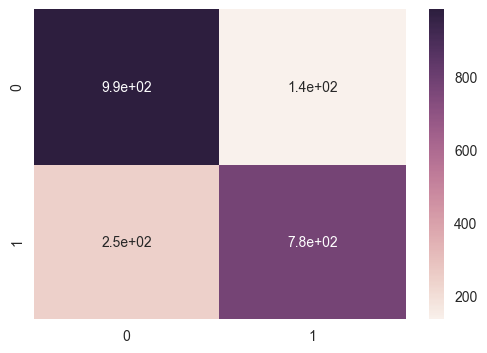

In [30]:
#import seaborn as sns
cm = metrics.confusion_matrix(y_test, randomForest.predict(x_test))
sns.heatmap(cm, annot=True)

As can be seen from our confusion matrix, our graph tended to have many true positives and false negatives, which would lead us to believe that our predictions from random forests were strong and appear to be good estimators.

In [31]:
metrics.roc_auc_score(y_test, randomForest.predict(x_test))

0.81683257118531183

Again, similar to our confusion matrix, we see our roc_auc score was very high at 83%.

In [32]:
randomForest.feature_importances_

array([ 0.05344263,  0.05273657,  0.03633001,  0.04878387,  0.04392285,
        0.14502775,  0.02842889,  0.0365138 ,  0.02957557,  0.04499448,
        0.04103973,  0.03674738,  0.03373294,  0.04341922,  0.04308983,
        0.04294413,  0.11905337,  0.04148456,  0.04366639,  0.03506604])

In [33]:
x_train.columns

Index([u'Unnamed: 0', u'AVG', u'HR', u'R', u'RBI', u'SB', u'method',
       u'previous_2B', u'previous_3B', u'previous_AB', u'previous_AVG',
       u'previous_BB', u'previous_HR', u'previous_OBP', u'previous_R',
       u'previous_RBI', u'previous_SB', u'previous_SLG', u'previous_SO',
       u'previous_age'],
      dtype='object')

Here we attempted to determine which features were most relevant in our predictions.  This x_train was being used to attempt a correct prediction for number of SB (stolen bases) and this model would appear to correctly place the largest emphasis on the 'previous_SB' statistic (higher than any other feature importance by nearly 10%).

In [34]:
# we took out this scatter plot and the next one but are planning to incorporate this additional analysis at
#     a later time
#plt.scatter(x_train.iloc[:,15], x_train.iloc[:,4], c=y_train, cmap=plt.cm.BuGn)

In [35]:
# running random forests for pitchers

best_params = []

for col in to_predict_pitchers:
    y = pitcher_predictions[col].tolist()
    x_train, x_test, y_train, y_test = train_test_split(x_pitchers, y)
    
    randomForest = RandomForestClassifier()
    parameters = {'n_estimators':[10, 15, 20], 'criterion':['gini', 'entropy'], \
                  'min_samples_leaf':[1, 5], 'max_features':['auto', 'sqrt'],\
                  'max_leaf_nodes':[None, 5], 'bootstrap':[True], 'n_jobs':[1, -1]}
    clf = GridSearchCV(randomForest, parameters)
    clf.fit(x_train, y_train)
    best_params.append({col:clf.best_params_})
    
rforest_pitchers_params = best_params

In [36]:
# pitchers random forest using the optimal parameters

accuracy_list_Forests_pitchers = []
accuracy_list_Forests_pitchers_ERA = []
accuracy_list_Forests_pitchers_K = []
accuracy_list_Forests_pitchers_W = []
accuracy_list_Forests_pitchers_WHIP = []

for i in xrange(10):
    for col in to_predict_pitchers:
        y = pitcher_predictions[col].tolist()
        x_train, x_test, y_train, y_test = train_test_split(x_pitchers, y)

        randomForest = RandomForestClassifier(n_jobs=-1, min_samples_leaf=5, n_estimators=20, criterion='gini',\
                                             max_features='sqrt')
        randomForest.fit(x_train, y_train)
        acc = metrics.accuracy_score(y_test, randomForest.predict(x_test))
        accuracy_list_Forests_pitchers.append(acc)
        
        if col == 'correct_ERA':
            accuracy_list_Forests_pitchers_ERA.append(acc)
        elif col == 'correct_K':
            accuracy_list_Forests_pitchers_K.append(acc)
        elif col == 'correct_W':
            accuracy_list_Forests_pitchers_W.append(acc)
        elif col == 'correct_WHIP':
            accuracy_list_Forests_pitchers_WHIP.append(acc)

print "%-15s" % 'overall average', np.mean(accuracy_list_Forests_pitchers)
print "%-15s" % 'correct_ERA', np.mean(accuracy_list_Forests_pitchers_ERA)
print "%-15s" % 'correct_K', np.mean(accuracy_list_Forests_pitchers_K)
print "%-15s" % 'correct_W', np.mean(accuracy_list_Forests_pitchers_W)
print "%-15s" % 'correct_WHIP', np.mean(accuracy_list_Forests_pitchers_WHIP)

overall average 0.762467948718
correct_ERA     0.858717948718
correct_K       0.667051282051
correct_W       0.739358974359
correct_WHIP    0.784743589744


In [37]:
# Forests using exact optimal parameters for our pitchers

accuracy_lists_pitchers(RandomForestClassifier)

overall average 0.757948717949
correct_ERA     0.860897435897
correct_K       0.657820512821
correct_W       0.729615384615
correct_WHIP    0.783461538462


Random forests was not quite as accurate for predicting pitcher projections as it was for hitters.  However, despite not being as accurate, the predictions were still pretty good.  The best prediction was for 'correct\_ERA' with an 86.6% and the worst was a measly 65.9% for 'correct\_K'.

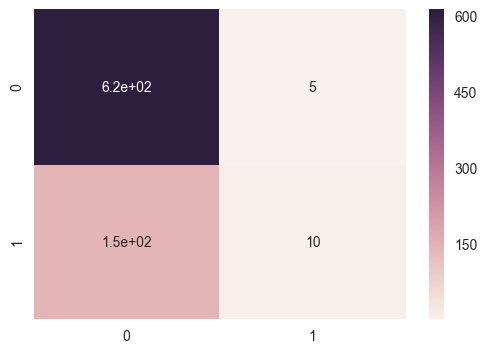

In [38]:
cm = metrics.confusion_matrix(y_test, randomForest.predict(x_test))
sns.heatmap(cm, annot=True)

While our results for true positive were definitely the most significant statistic in our confusion_matrix, the number of true negatives was also a significant portion of the results (rather than false positives which we would have hoped for)

In [39]:
metrics.roc_auc_score(y_test, randomForest.predict(x_test))

0.52742077598517301

As can be expected due to our confusion_matrix results, the roc_auc statistic is not very promising with a 55%, due in large part to the second largest amount of results being seen in the true negatives portion rather than in false negatives.

In [40]:
randomForest.feature_importances_

array([ 0.07034598,  0.041002  ,  0.07254058,  0.07294973,  0.02476141,
        0.06144793,  0.01518842,  0.06345543,  0.07108015,  0.07305115,
        0.07427776,  0.08131474,  0.0769242 ,  0.06672681,  0.01412949,
        0.04525258,  0.07555164])

In [41]:
x_train.columns

Index([u'Unnamed: 0', u'Age', u'ERA', u'K', u'W', u'WHIP', u'method',
       u'previous_BB', u'previous_BF', u'previous_ERA', u'previous_FIP',
       u'previous_H', u'previous_IP', u'previous_K', u'previous_SV',
       u'previous_W', u'previous_WHIP'],
      dtype='object')

Apparently, the previous_WHIP feature is helpful in predicting WHIP, but other features such as ERA and K are slightly more significant for our predictions.

In [42]:
#plt.scatter(x_train.iloc[:,-1], x_train.iloc[:,2], c=y_train, cmap=plt.cm.BuGn)